<a href="https://colab.research.google.com/github/Hion-cy/ClassFiles/blob/main/PracticaRegresionLinealMultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Práctica: Regresión Lineal Múltiple
---


## Datos del Estudiante

*   Apellidos y Nombre: Hion Vela Carmen Yolanda
*   Matrícula: AL213658

---



##  Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar regresión lineal múltiple utilizando Scikit-Learn para modelar la relación entre varias variables independientes y una variable dependiente**, verificar los supuestos del modelo, interpretar los coeficientes, analizar la correlación entre predictores y evaluar el rendimiento del modelo utilizando métricas como el MSE, RMSE y R².

Datos
Trabajarás con el archivo `advertising.csv`, que contiene información sobre el gasto publicitario en diferentes medios y las ventas obtenidas:

-`TV`: inversión en publicidad televisiva.

-`Radio`: inversión en publicidad en radio.

-`Newspaper`: inversión en publicidad en periódicos.

`Sales`: ventas del producto (variable dependiente).

## Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `advertising.csv`.
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente las variables.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import probplot
import statsmodels.api as sm


from google.colab import drive
drive.mount('/content/drive')

df=pd.read_csv('/content/drive/MyDrive/ClassFiles/advertising.csv')
print(df.head())
print(df.describe())
print(df.info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----

## Parte 2: Análisis exploratorio de los datos
### 2.1  Análisis de la Relación Lineal entre la variable dependiente y las independientes
1. Grafica dispersión entre cada variable independiente (`TV`, `Radio`, `Newspaper`) y `Sales`. Usa también regplot.
2. Interpreta visualmente la relación entre variables.

*Visualmente, el gasto en Televisión muestra la relación más fuerte y clara con las Ventas: a mayor inversión, las ventas suben de forma muy predecible. La Radio también tiene un impacto positivo, pero la conexión es menos precisa, mostrando una dispersión más amplia. Finalmente, la inversión en Periódicos parece ser la menos efectiva, ya que los puntos están muy dispersos y no indican una tendencia ascendente clara; gastar más en prensa no garantiza un aumento significativo en las Ventas.*

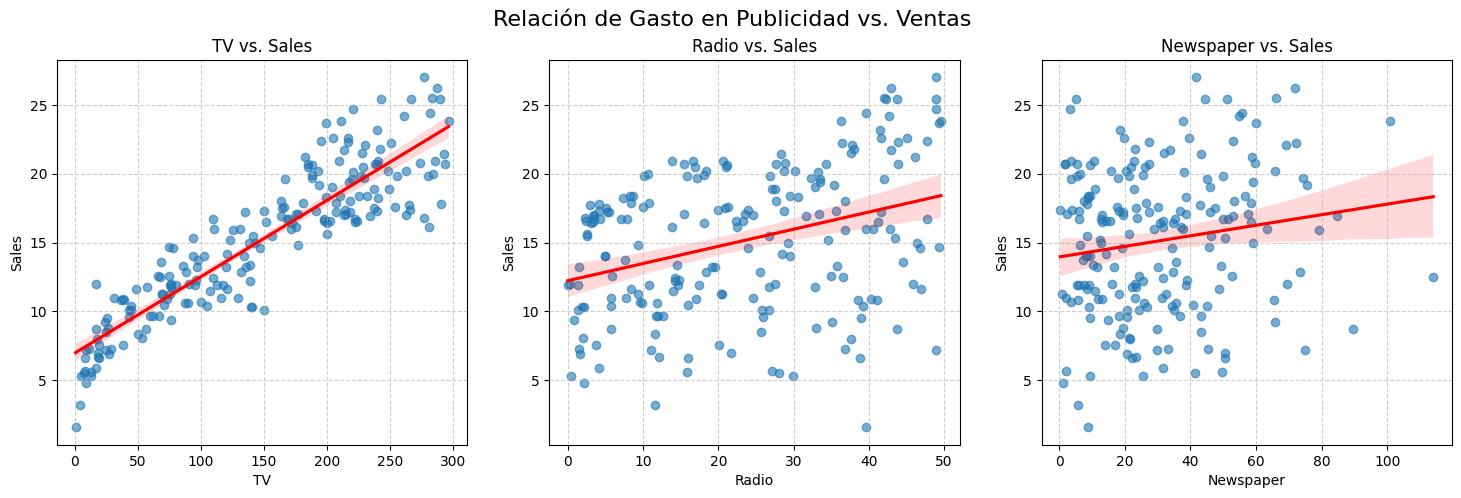

In [8]:
independientes = ['TV', 'Radio', 'Newspaper']
target = 'Sales'

# Configurar el lienzo para las 3 gráficas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Relación de Gasto en Publicidad vs. Ventas', fontsize=16)

# Generar un regplot para cada variable independiente
for i, col in enumerate(independientes):
    sns.regplot(x=col, y=target, data=df, ax=axes[i], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    axes[i].set_title(f'{col} vs. Sales')
    axes[i].grid(True, linestyle='--', alpha=0.6)
plt.show()

### 2.2: Correlación entre variables
1. Calcula la matriz de correlación.
2. Visualízala con un heatmap.
3. Responde: ¿Qué variables están más correlacionadas con `Sales`? ¿Hay correlación alta entre predictores?

*La variable mas relacionada con Sales es TV con 0.9 y no parece que haya una relacion alta entre predictores ya que ninguna se acerca lo suficiente a 1 (ni siquiera a 0.5).*

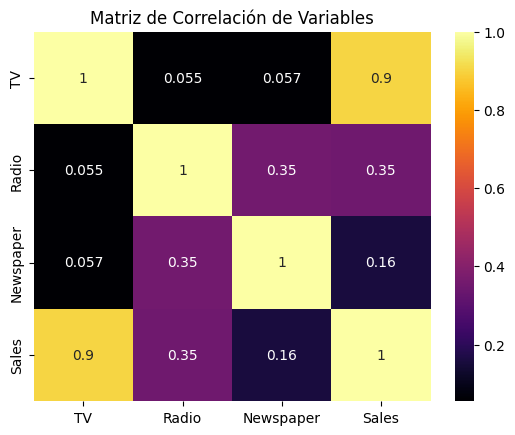

In [13]:
# Correlación y heatmap
correlacion = df.corr()
sns.heatmap(correlacion, annot=True, cmap='inferno')
plt.title("Matriz de Correlación de Variables")
plt.show()

## Parte 3. Multicolinealidad
1. Calcula el VIF (Variance Inflation Factor) para cada predictor.
2. Crea un diagrama de barras  para mostrar el  VIF
3. Interpreta si hay multicolinealidad:
- ¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?
*No. Ninguna de las variables predictoras (TV, Radio, Newspaper) tiene un Factor de Inflación de la Varianza mayor a 5, todos los valores son menores a 4*
- ¿Qué implicaciones tiene esto para el modelo?
*Indica que la multicolinealidad no es un problema en este modelo de regresión. Por lo tanto el desarrollo de una variable no afecta la otra.*

In [40]:
# @title
#Multicolinealidad
X = df[['TV', 'Radio', 'Newspaper']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


        VIF
0  2.486772
1  3.285462
2  3.055245


## Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación

### 4.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes  en términos de ventas?
*A pesar de que en las primeras graficas TV parecia la variable mas estable y por lo tanto mas fuerte, el coeficiente de ventas de radio, demostro ser el que mas retibuciones proporciona. Por lo tanto si se busca una retribucion economica fuerte, ese es el producto que debe venderse, seguido de TV y finalmente periodico (newspaper) cuya retirbucion es minima en comparacion con las otras 2.*

In [41]:
#ntrenamiento del Modelo (Todas las Variables Independientes)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

model = LinearRegression()
model.fit(X, y)
#coeficiente e intercepto
print("Intercepto:", model.intercept_)
print("Coeficientes:", model.coef_)

Intercepto: 4.625124078808653
Coeficientes: [0.05444578 0.10700123 0.00033566]


### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?
*Si, la campana dentro del grafico parece ser normala pesar de alargarse hacia el lado negativo.*

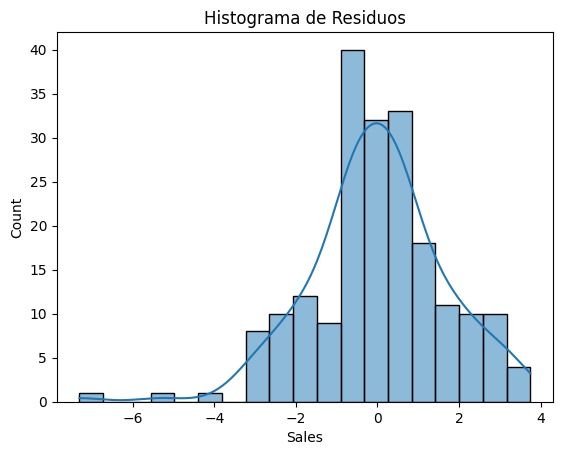

In [42]:
#Normalidad de los residuos
y_pred = model.predict(X)
residuals = y - y_pred
sns.histplot(residuals, kde=True)
plt.title("Histograma de Residuos")
plt.show()

### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?
*Existe un patron que muestra que a medida que los Valores Predichos aumentan (se mueven hacia la derecha en el eje X), la dispersión vertical de los residuos también aumenta, por lo tanto no es completamente aleatoria.*

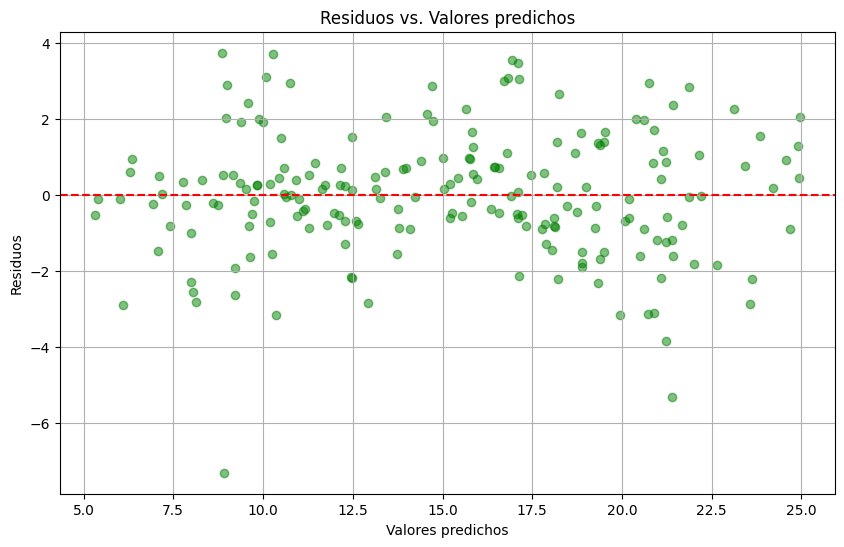

In [43]:
# Homocedasticidad
plt.figure(figsize=(10, 6))
plt.scatter(x=y_pred, y=residuals, alpha=0.5,color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores predichos')
plt.grid(True)
plt.show()

### 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico:
a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal,
b) Desviaciones sistemáticas indican asimetría o colas pesadas.

*La grafica muestra una tendencia a la normalidad con precensia de asimetrias en los extremos. Esto nos indica que el modelo es robusto en cuanto al supuesto de normalidad. No es ideal, por la presencia de desviacion en los extremos pero no es necesaria una transformacion drastica.*

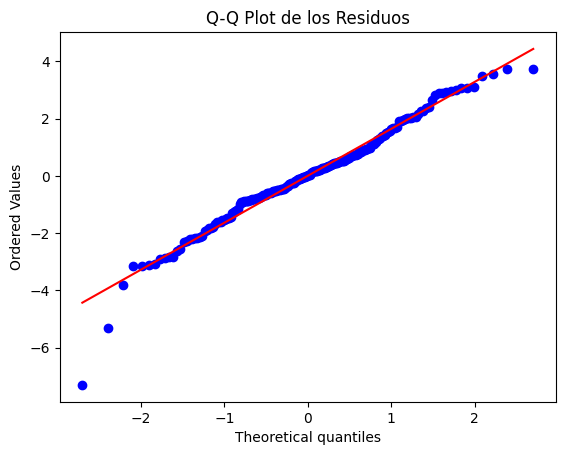

In [44]:
#Q-Q Plot
probplot(residuals, plot=plt)
plt.title("Q-Q Plot de los Residuos")
plt.show()

### 4.5. Evaluación del Modelo

1. Calcula las métricas:

a) MSE (error cuadrático medio),

b) RMSE (raíz del error cuadrático medio),

c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?

*El modelo muestra  Coeficiente de Determinación 0.9026 lo que nos indica un ajuste muy bueno, esto es respaldado por un RMSE de 1.645.*

In [45]:
#Evaluación del Modelo
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MSE: 2.706006147627315
RMSE: 1.6449942697855562
R²: 0.9025912899684558


### 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.

3.¿Qué observas?¿Qué observas? ¿Qué información puedes obtener de esta gráfica?
*La gran mayoría de los puntos se agrupan muy cerca de la línea diagonal, esto respalda el valor de 0.9026 obtenido en el punto anterior. Mientras que los puntos alejados de la diagonal son pocos y esto refleja el RMSE de 1.64*

Text(0, 0.5, 'Ventas predichas')

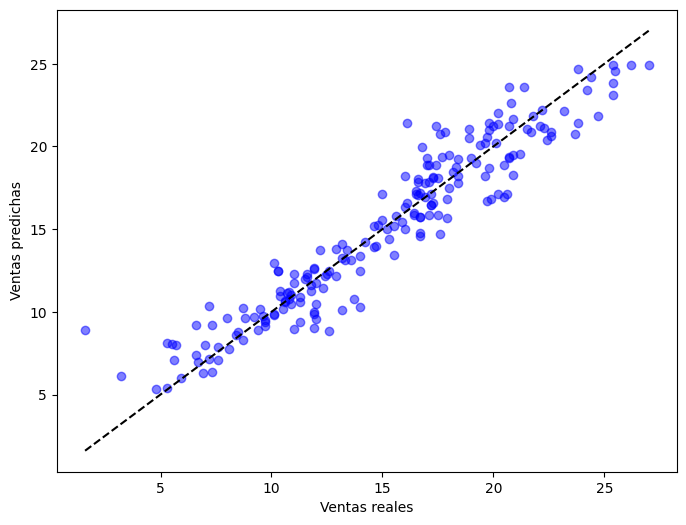

In [46]:
#Visualización de las Predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--')
plt.xlabel('Ventas reales')
plt.ylabel('Ventas predichas')


### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.


 - ¿Qué variables tienen p-value menores a 0.05?
 *Las variables con mas impacto son Tv y Radio*


 - ¿Cuál es la conclusión sobre esas variables?
*En cuestion de ventas, son estadisticamente mas propensas a proporcionar un impacto. Contrario a newspaper que aparenta generar diferencias si existe o no venta de ese producto.*

In [47]:
#P-values

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 20 Oct 2025   Prob (F-statistic):           8.13e-99
Time:                        00:27:57   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

##Parte 5:  Construcción del Modelo (sin Multicolinealidad), Evaluación

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

**No existen variables con multicoloneidad**

## Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación

En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica y realiza lo siguiente.

En el caso de que hayas detectado variables sin una relación lineal. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

In [48]:
# Definir el nuevo conjunto de predictores
X_final = df[['TV', 'Radio']]
y = df['Sales']

X_final = sm.add_constant(X_final)
model_final = sm.OLS(y, X_final).fit()
print("Resumen Estadístico del Modelo Final:")
print(model_final.summary())

Resumen Estadístico del Modelo Final:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Mon, 20 Oct 2025   Prob (F-statistic):          2.39e-100
Time:                        00:36:23   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         


#### 4.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes  en términos de ventas?
*Ambos productos afectan significativamente cuando se realiza una compra.*

In [51]:
#modelo
X_final = df[['TV', 'Radio']]
y = df['Sales']

model = LinearRegression()
model.fit(X_final, y)
#coeficiente e intercepto
print("Intercepto:", model.intercept_)
print("Coeficientes:", model.coef_)


Intercepto: 4.630879464097768
Coeficientes: [0.05444896 0.10717457]


#### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?
*Si, la campana dentro del grafico parece ser normala pesar de alargarse hacia el lado negativo.*

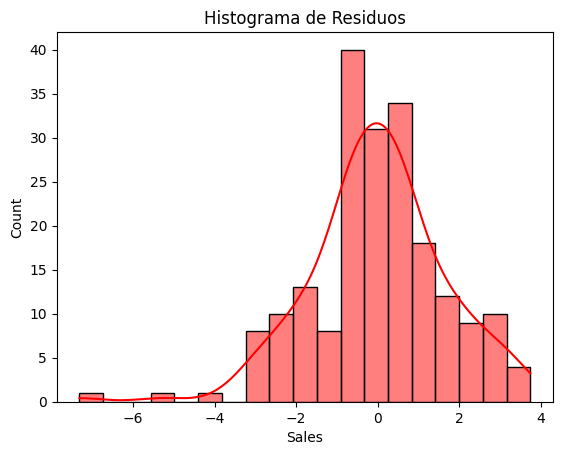

In [55]:
#Normalidad de los residuos
y_pred = model.predict(X_final)
residuals = y - y_pred
sns.histplot(residuals, kde=True, color='Red')
plt.title("Histograma de Residuos")
plt.show()

#### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?
*Existe un patron que muestra que a medida que los Valores Predichos aumentan (se mueven hacia la derecha en el eje X), la dispersión vertical de los residuos también aumenta, por lo tanto no es completamente aleatoria.*

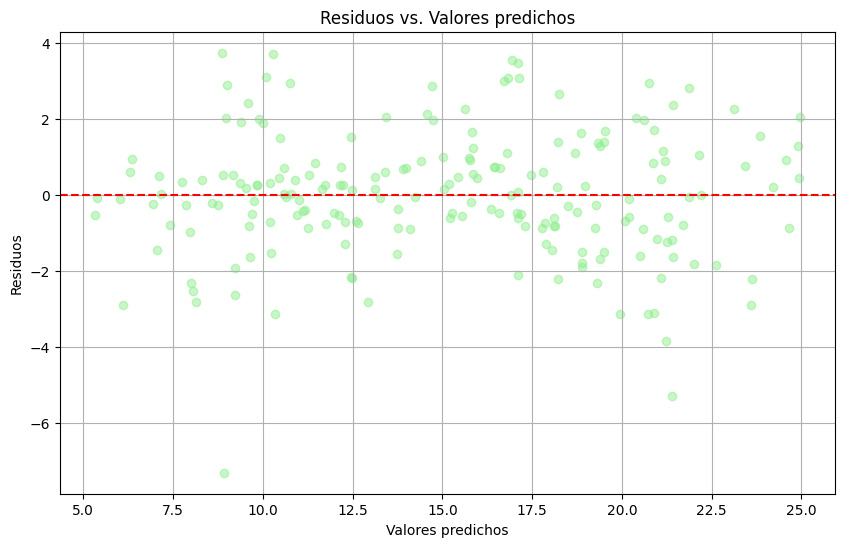

In [54]:
# Homocedasticidad
plt.figure(figsize=(10, 6))
plt.scatter(x=y_pred, y=residuals, alpha=0.5,color='lightgreen')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores predichos')
plt.grid(True)
plt.show()

### 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico:
a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal,
b) Desviaciones sistemáticas indican asimetría o colas pesadas.

*La grafica mantiene la tendencia a la normalidad con precensia de asimetrias en los extremos.*

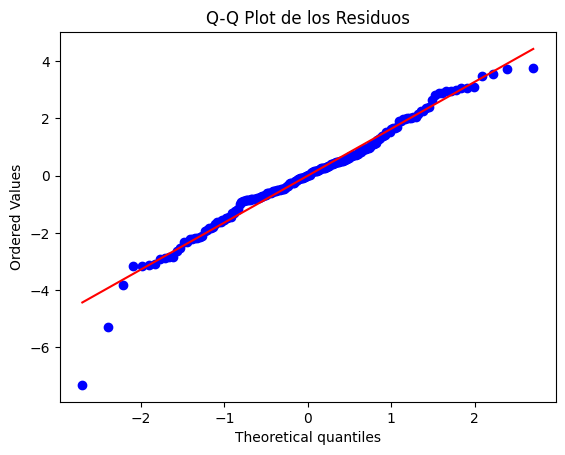

In [56]:
#Q-Q Plot
probplot(residuals, plot=plt)
plt.title("Q-Q Plot de los Residuos")
plt.show()

### 4.5. Evaluación del Modelo

1. Calcula las métricas:

a) MSE (error cuadrático medio),

b) RMSE (raíz del error cuadrático medio),

c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?

*Los cambios en las metricas son minimos luego de eliminar la variable.*
MSE: 2.706006147627315 a MSE: 2.7060525778834883

RMSE: 1.6449942697855562 a RMSE: 1.6450083823140502

R²: 0.9025912899684558 a R²: 0.9025896186081139

In [57]:
#Evaluación del Modelo
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)
#MSE: 2.706006147627315
#RMSE: 1.6449942697855562
#R²: 0.9025912899684558

MSE: 2.7060525778834883
RMSE: 1.6450083823140502
R²: 0.9025896186081139


### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.


 - ¿Qué variables tienen p-value menores a 0.05?
 *Ambas variables generan un impacto son Tv y Radio*


 - ¿Cuál es la conclusión sobre esas variables?
*Aunque vender radios genere mas ganancias que vender tvs, ambas son importantes para obtener beneficios*

In [59]:
#P-values

X = sm.add_constant(X_final)
model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Mon, 20 Oct 2025   Prob (F-statistic):          2.39e-100
Time:                        00:46:39   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.0

##7. Conclusiones.

¿Cuál de los tres modelos construidos fue el mejor?
*El modelo que utiliza unicamente TV y Radio fue el mejor. Independientemente de que en el primero exista periodico (Newpaper) una vez que se elimina, es posible observar la practicamentenula influencia que tiene sobre los metricos de ambos modelos*
¿Cuál fue el atributo que mas influencia tiene en las ventas?
*En ambos casos, Radio es el que mas retribuciones muestra en cuestion de ventas, a pesar de que TV graficamente muestra una tendencia mas "normal"*